In [1]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('src/data1.txt',names=['population','profit'])

In [3]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


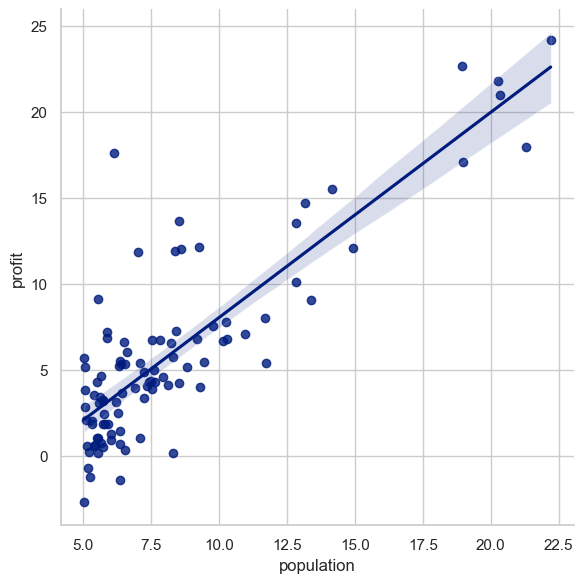

In [6]:
sns.lmplot(x='population',y='profit', data=df, height=6)
plt.show()

In [7]:
def get_X(df):
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones,df],axis=1)
    return data.iloc[:,:-1].values

def get_y(df):
    return df.iloc[:,-1].values.flatten()

def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())

# 计算代价函数

In [8]:
data = df
X = get_X(data)
print("X:",X.shape, type(X))

y = get_y(data)
print("y:",y.shape, type(y))

X: (97, 2) <class 'numpy.ndarray'>
y: (97,) <class 'numpy.ndarray'>


In [9]:
theta = np.zeros(X.shape[1])
print(theta)

[0. 0.]


In [10]:
def lr_cost(theta, X, y):
    """ 计算代价函数
    X: R(m*n), m 样本数, n 特征数
    y: R(m)
    theta : R(n), 线性回归的参数
    """
    m = X.shape[0]

    inner = X @ theta - y

    square_sum = inner.T @ inner
    cost = square_sum / (2*m)

    return cost

In [11]:
lr_cost(theta, X, y)

np.float64(32.072733877455676)

# 批量梯度下降 Batch Gradient Decent

In [12]:
def gradient(theta, X, y):
    """
    计算梯度
    """
    m = X.shape[0]

    inner = X.T @ (X @ theta - y)

    return inner / m

In [13]:
def batch_gradient_decent(theta, X, y, epoch, alpha=0.01):
    """
    批量梯度下降函数 拟合线性回归，返回参数和代价
    """
    cost_data = [lr_cost(theta, X, y)]
    _theta = theta.copy()

    for _ in range(epoch):
        _theta = _theta - alpha * gradient(_theta, X, y)
        cost_data.append(lr_cost(_theta, X, y))

    return _theta, cost_data

In [14]:
epoch = 500
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch)

In [15]:
final_theta

array([-2.28286727,  1.03099898])

In [16]:
cost_data

[np.float64(32.072733877455676),
 np.float64(6.737190464870009),
 np.float64(5.931593568604956),
 np.float64(5.901154707081388),
 np.float64(5.895228586444221),
 np.float64(5.890094943117332),
 np.float64(5.885004158443646),
 np.float64(5.8799324804914175),
 np.float64(5.874879094762575),
 np.float64(5.869843911806386),
 np.float64(5.864826865312929),
 np.float64(5.859827889932181),
 np.float64(5.85484692057229),
 np.float64(5.849883892376587),
 np.float64(5.844938740722034),
 np.float64(5.840011401218361),
 np.float64(5.835101809707226),
 np.float64(5.830209902261388),
 np.float64(5.825335615183862),
 np.float64(5.820478885007099),
 np.float64(5.815639648492152),
 np.float64(5.810817842627869),
 np.float64(5.806013404630044),
 np.float64(5.801226271940628),
 np.float64(5.796456382226899),
 np.float64(5.7917036733806535),
 np.float64(5.786968083517396),
 np.float64(5.782249550975539),
 np.float64(5.777548014315596),
 np.float64(5.772863412319381),
 np.float64(5.768195683989212),
 np.fl

# 代价数据可视化

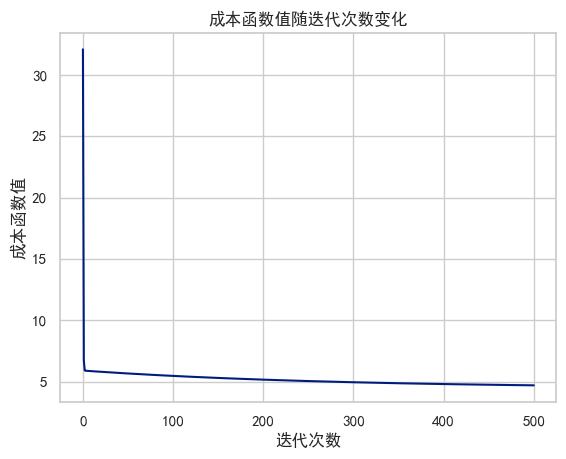

In [17]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用 SimHei 字体来支持中文显示
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题

plt.plot(cost_data)
plt.xlabel('迭代次数')
plt.ylabel('成本函数值')
plt.title('成本函数值随迭代次数变化')
plt.show()

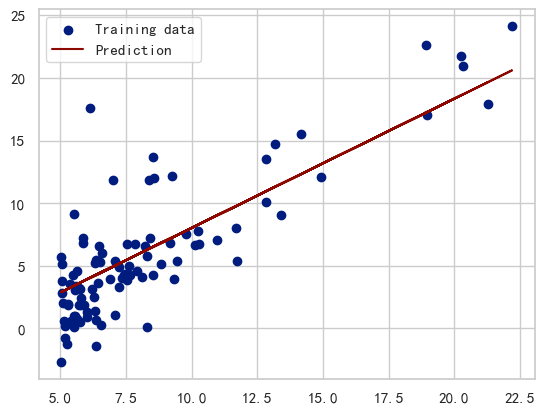

In [18]:
b = final_theta[0] # intercept，Y轴上的截距
m = final_theta[1] # slope，斜率

plt.scatter(data.population, data.profit, label="Training data")
plt.plot(data.population, data.population*m + b, 'r', label="Prediction")
plt.legend(loc=2)
plt.show()

## scikit-learn model的预测表现

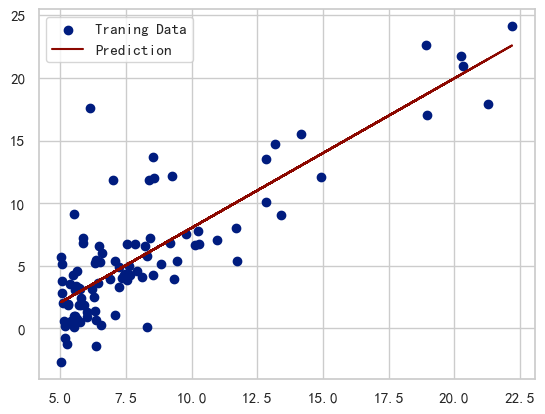

In [19]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

x = X[:,1]
f = model.predict(X).flatten()

plt.scatter(X[:,1], y, label='Traning Data')
plt.plot(x, f, 'r', label='Prediction')
plt.legend(loc=2)
plt.show()

# 新章节
多变量

In [20]:
raw_data = pd.read_csv('src/data2.txt',names=['squqre', 'bedrooms', 'price'])
raw_data.head()

,squqre,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 标准化数据

In [21]:
def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std()) 

In [22]:
data = normalize_feature(raw_data)
data.head()
data

,squqre,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389
5,-0.019732,1.090417,-0.323998
6,-0.587240,-0.223675,-0.204036
7,-0.721881,-0.223675,-1.130948
8,-0.781023,-0.223675,-1.026973
9,-0.637573,-0.223675,-0.783051


## 多变量批量梯度下降 Multi-var batch gradient decent

In [23]:
X = get_X(data)
print('X:', X.shape, type(X))

y = get_y(data)
print('y:', y.shape, type(y))

y

X: (47, 3) <class 'numpy.ndarray'>
y: (47,) <class 'numpy.ndarray'>


array([ 0.47574687, -0.08407444,  0.22862575, -0.86702453,  1.59538948,
       -0.32399786, -0.20403615, -1.13094828, -1.02697347, -0.78305133,
       -0.80305294,  0.05268191, -0.08328269,  2.87498104, -0.64389575,
        0.87561923, -0.32399786, -1.12374258,  1.27627534,  2.06803861,
       -0.69987788, -0.68308324, -0.77985235, -0.64389575,  1.86730269,
       -0.72387022,  0.99238196,  1.02837047,  1.07635515, -0.32399786,
        0.0758745 , -1.363666  , -0.20403615,  1.91528737, -0.43596212,
       -0.72387022, -0.88381916,  0.03668701,  1.66816625, -0.42716493,
        0.22462702, -0.08407444, -0.21123385, -0.33119556, -1.28369153,
       -0.32399786, -0.80704367])

In [24]:
alpha = 0.01 #学习率
theta = np.zeros(X.shape[1])
epoch = 500
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)
final_theta


array([-1.16679716e-16,  8.30383883e-01,  8.23982853e-04])

In [25]:
cost_data

[np.float64(0.4893617021276595),
 np.float64(0.4805491041076718),
 np.float64(0.4719858770120386),
 np.float64(0.4636646161870627),
 np.float64(0.4555781400525299),
 np.float64(0.44771948335326117),
 np.float64(0.4400818906150644),
 np.float64(0.43265880979889004),
 np.float64(0.42544388614718714),
 np.float64(0.4184309562166347),
 np.float64(0.4116140420916036),
 np.float64(0.4049873457728716),
 np.float64(0.39854524373628336),
 np.float64(0.3922822816562034),
 np.float64(0.38619316928877423),
 np.float64(0.3802727755101314),
 np.float64(0.37451612350488717),
 np.float64(0.3689183861003258),
 np.float64(0.36347488124189703),
 np.float64(0.35818106760572727),
 np.float64(0.35303254034399595),
 np.float64(0.34802502695915444),
 np.float64(0.3431543833030802),
 np.float64(0.3384165896973838),
 np.float64(0.3338077471711977),
 np.float64(0.3293240738128864),
 np.float64(0.32496190123222946),
 np.float64(0.32071767112972555),
 np.float64(0.3165879319697777),
 np.float64(0.3125693357546088)

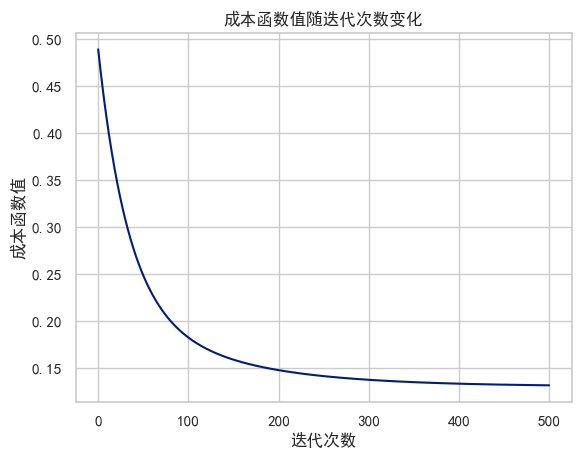

In [26]:
plt.plot(cost_data)
plt.xlabel('迭代次数')
plt.ylabel('成本函数值')
plt.title('成本函数值随迭代次数变化')
plt.show()

### Scikit-learn 的预测

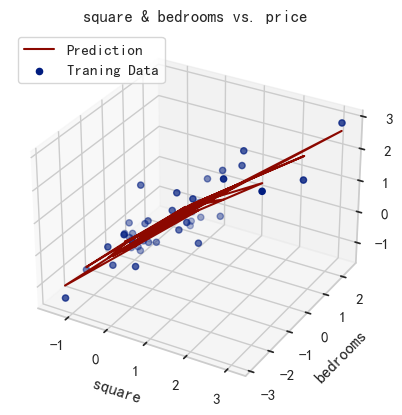

In [27]:
from mpl_toolkits.mplot3d import Axes3D

model = linear_model.LinearRegression()
model.fit(X, y)

f = model.predict(X).flatten()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:,1], X[:,2], f, 'r', label='Prediction')
ax.scatter(X[:,1], X[:,2], y,label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
ax.set_title('square & bedrooms vs. price')
plt.show()

## 学习率

In [28]:
base = np.logspace(-1,-5,num=4)
candidate = np.sort(np.concatenate((base,base*3)))
print(base)

[1.00000000e-01 4.64158883e-03 2.15443469e-04 1.00000000e-05]


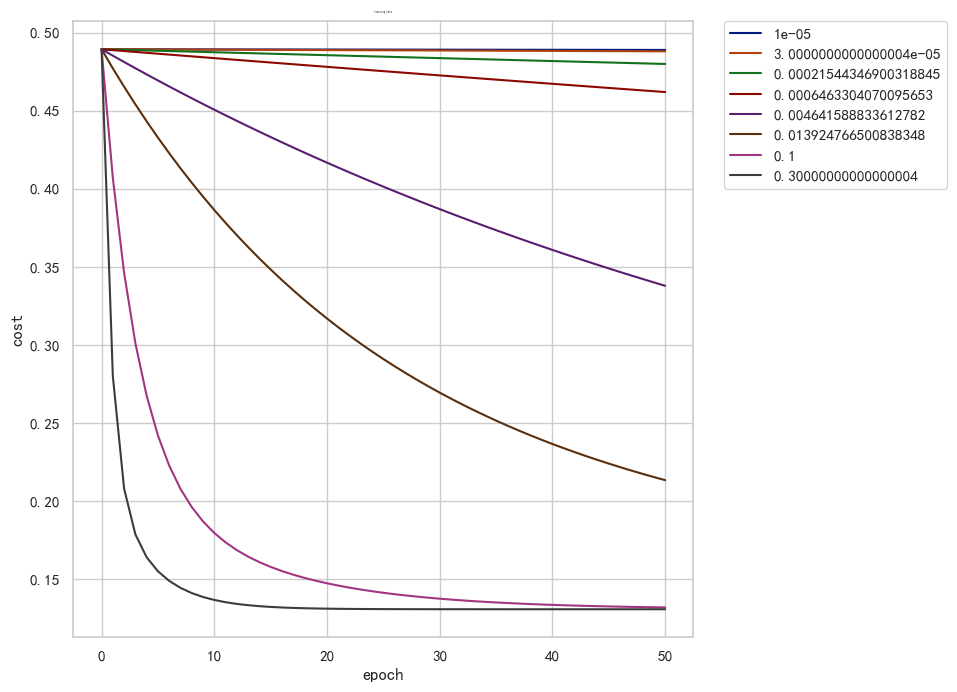

In [29]:
epoch=50

fig,ax = plt.subplots(figsize=(8,8))

for alpha in candidate:
    _, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)
    ax.plot(np.arange(epoch+1), cost_data, label=alpha)

ax.set_xlabel('epoch', fontsize=12)
ax.set_ylabel('cost', fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
ax.set_title('learning rate', fontsize=2)
plt.show()

## 正规方程 - Normal equation
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：
 
 。 假设我们的训练集特征矩阵为 X（包含了
）并且我们的训练集结果为向量 y，则利用正规方程解出向量 
 。 上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵
，则：

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型

正规方程：不需要选择学习率α，一次计算得出，需要计算
，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为O(n3)，通常来说当n小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [30]:
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [31]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

array([-1.11022302e-16,  8.84765988e-01, -5.31788197e-02])

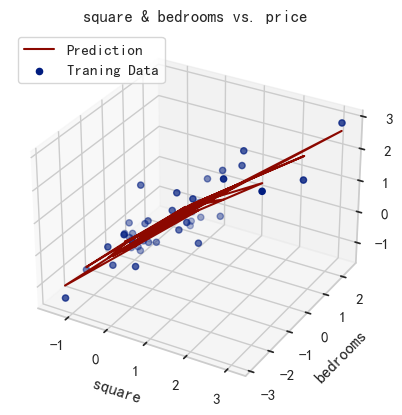

In [32]:
f = final_theta2[0] + final_theta2[1] * X[:,1] + final_theta2[2] * X[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:,1], X[:,2], f, 'r', label='Prediction')
ax.scatter(X[:,1], X[:,2], y, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
ax.set_title('square & bedrooms vs. price')
#ax.view_init(30, 10)
plt.show()